In [1]:
!pip install contractions
!pip install inflect
!pip install fuzzywuzzy

#text preprocess file
import unicodedata
import contractions  
import inflect 
import nltk
from nltk import sent_tokenize
from nltk.corpus import stopwords
import pandas as pd
import re

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words


In [2]:
df = pd.read_csv('ConsolidatedTwitter.csv',encoding='utf-8')

In [3]:
def clean_tweet(tweet): #remove user name, special characters and urls
    # removing urls
    tweet = re.sub(r'https?://\S+',' ',tweet)
    # removing user names
    user_names = re.findall(r"(@[A-Za-z0-9]+)", tweet)
    #iterating to remove multiple user names
    for i in user_names:
        tweet = re.sub(i,' ', tweet)
    # replacing the special characters and numbers
    tweet = re.sub(r'([^A-Za-z\s])',' ',tweet)
    #replacing multiple spaces in to a single space
    tweet = re.sub(' +',' ', tweet)
    return tweet

def preprocess(text):
    text = replace_contractions(text)
    content = nltk.word_tokenize(text)
    words = remove_non_ascii(content)
    words = to_lowercase(content)
    words = remove_punctuation(words)
    text = ' '.join(words)
    return text


In [4]:
df['new_tweets'] = df['tweets'].apply(clean_tweet)
df['new_tweets'] = df['new_tweets'].apply(preprocess)

In [5]:
df['new_tweets'].to_csv(r'coronatweet.txt', header=None, index=None, sep=' ', mode='a')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [6]:
# install wordcloud
!pip install wordcloud

In [7]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [8]:
corona_tweets = open('coronatweet.txt', 'r').read()

In [9]:
stopwords = set(STOPWORDS)

In [10]:
# instantiate a word cloud object
corona_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
corona_wc.generate(corona_tweets)

In [13]:
import numpy as np  
from PIL import Image # converting images into arrays
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style
from matplotlib import pyplot

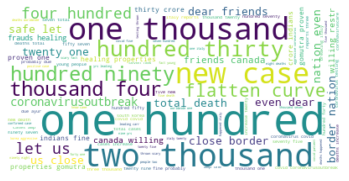

In [14]:
# display the word cloud
plt.imshow(corona_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

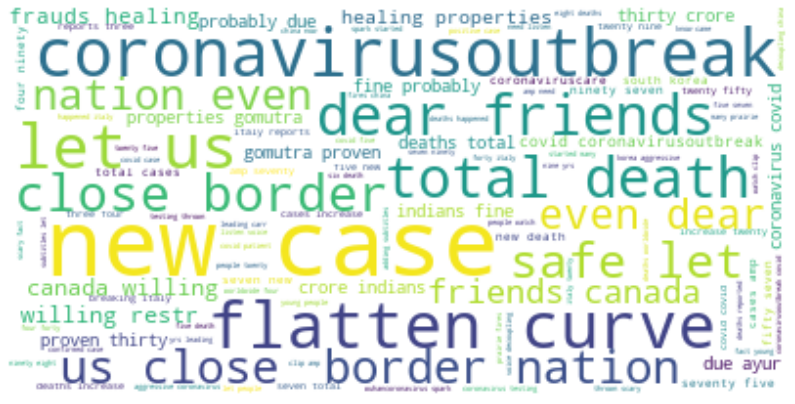

In [15]:
stopwords.add('hundred') # add the words said to stopwords
stopwords.add('thousand')
stopwords.add('one')
stopwords.add('two')
# re-generate the word cloud
corona_wc.generate(corona_tweets)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(corona_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
#corona_mask = np.array(Image.open(r'corona4.jpg'))
corona_mask_1 = np.array(Image.open(r'mask.jpg'))

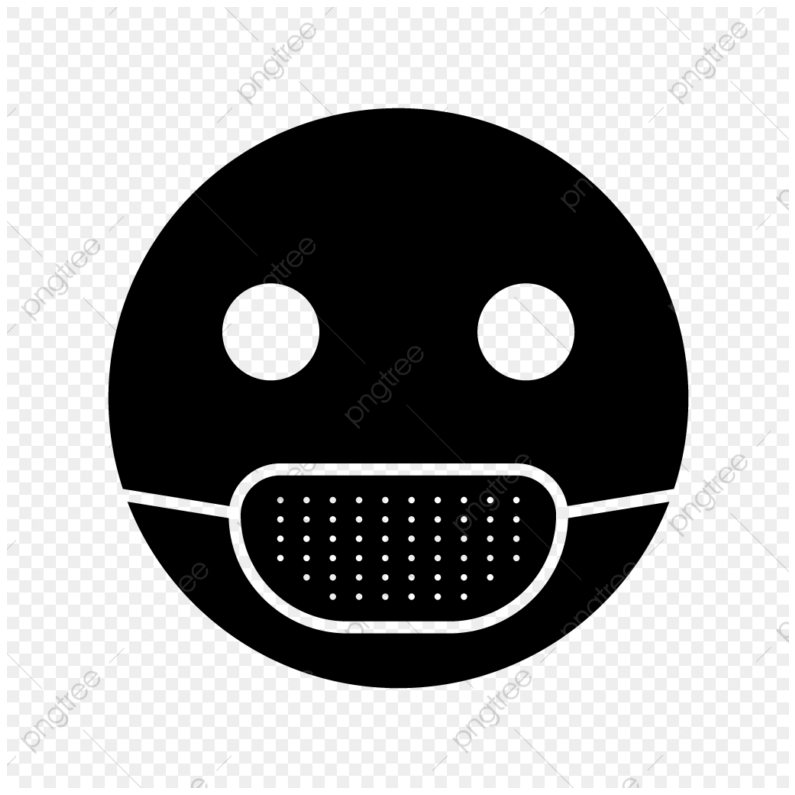

In [17]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(corona_mask_1, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

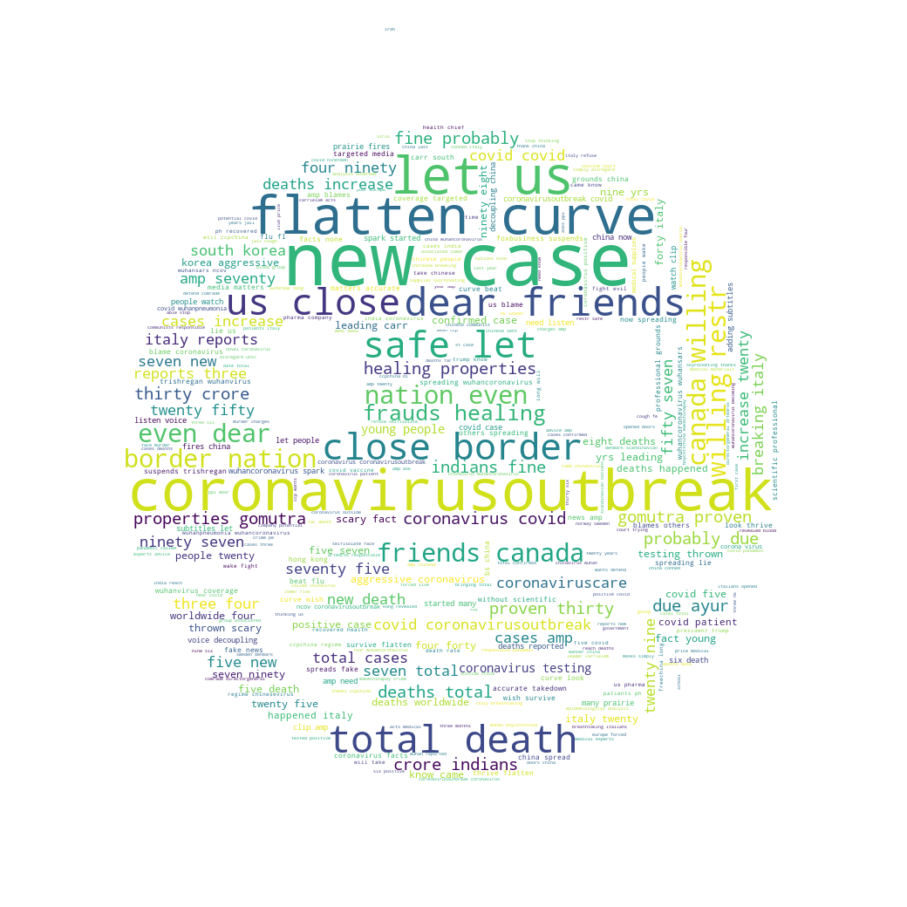

In [18]:
# instantiate a word cloud object
corona_wc = WordCloud(background_color='white', max_words=5000, mask=corona_mask_1, stopwords=stopwords)

# generate the word cloud
corona_wc.generate(corona_tweets)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(16) # set width
fig.set_figheight(20) # set height

plt.imshow(corona_wc, interpolation='bilinear')
plt.axis('off')
plt.show()